# **Project 2 of ECE 232E**
# **Social Network Mining**
### **Cheng Chang (UID 805851109)**
# **2. Google+ network**

In [38]:
if (!require("igraph")) install.packages("igraph")
library("igraph")

untar('gplus.tar.gz')

file_path ="gplus/" 
edge_files = list.files(path=file_path, pattern="edges") 
circles_files = list.files(path=file_path, pattern="circles")
fts_files = list.files(path=file_path, pattern="feat")
initial_graph = list()
final_graph = list()
graph_circles = list()
ego_nodes = list()

cnt = 0
node_names = c()

In [39]:
for (i in 1:length(edge_files)) {
    # get node id
    node = strsplit(edge_files[i], ".edges")[[1]]
    node_names = c(node_names, node)
    # print(node)
    ego_nodes[i] = node
    fc = file(paste(file_path, node, ".circles", sep=""), open="r") 
    if (length(fc) > 0) {
        file_lines = readLines(fc)
        if (length(file_lines) > 0) {
            circles = list()
            for (j in 1:length(file_lines)) {
                circle_users = strsplit(file_lines[j], "\t")
                circles[[j]] = circle_users[[1]][-1]
            }

            # find users who have more than 2 circles
            if (length(circles) > 2) {
                cnt = cnt + 1
                initial_graph[[i]] = read.graph(paste(file_path, edge_files[i], sep=""), format="ncol", directed=TRUE)
                graph_circles[[i]] = circles
                graph_nodes = V(initial_graph[[i]])
                # print(length(graph_nodes))
                # print(node)
                # add the core node to his neighbor list and construct the graph
                final_graph[[i]] = add.vertices(initial_graph[[i]], 1, name=node)
                core_index = which(V(final_graph[[i]])$name==node) 
                core_node_edges = list()
                ### add edges connecting to this core node
                for (k in 1:length(graph_nodes)) {
                    core_node_edges = c(core_node_edges, c(core_index, k))
                }
                final_graph[[i]] = add.edges(final_graph[[i]], core_node_edges)                
            } 
        }
    }
    close(fc)
}


### QUESTION 18

In [ ]:
cat("There are", cnt, "personal networks" )

There are 57 personal networks

* There are $57$ personal networks.

### QUESTION 19

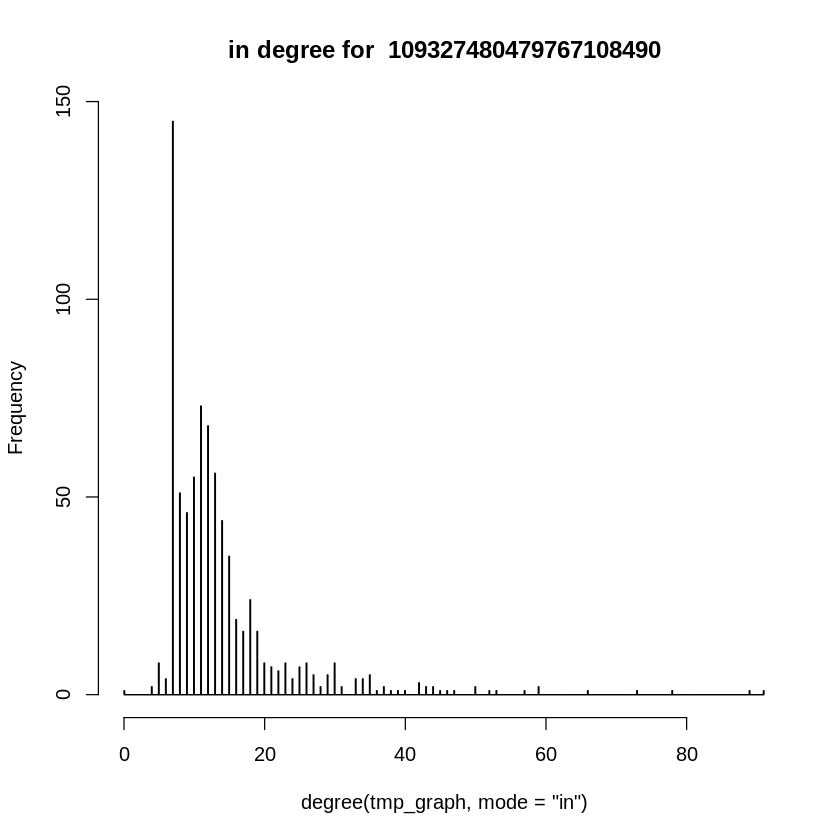

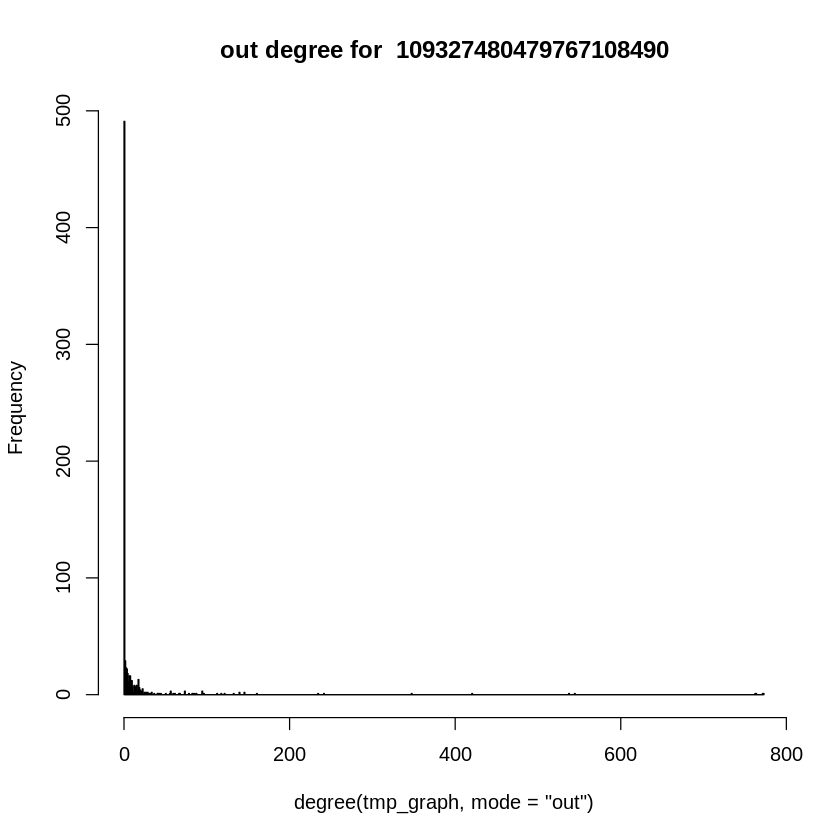

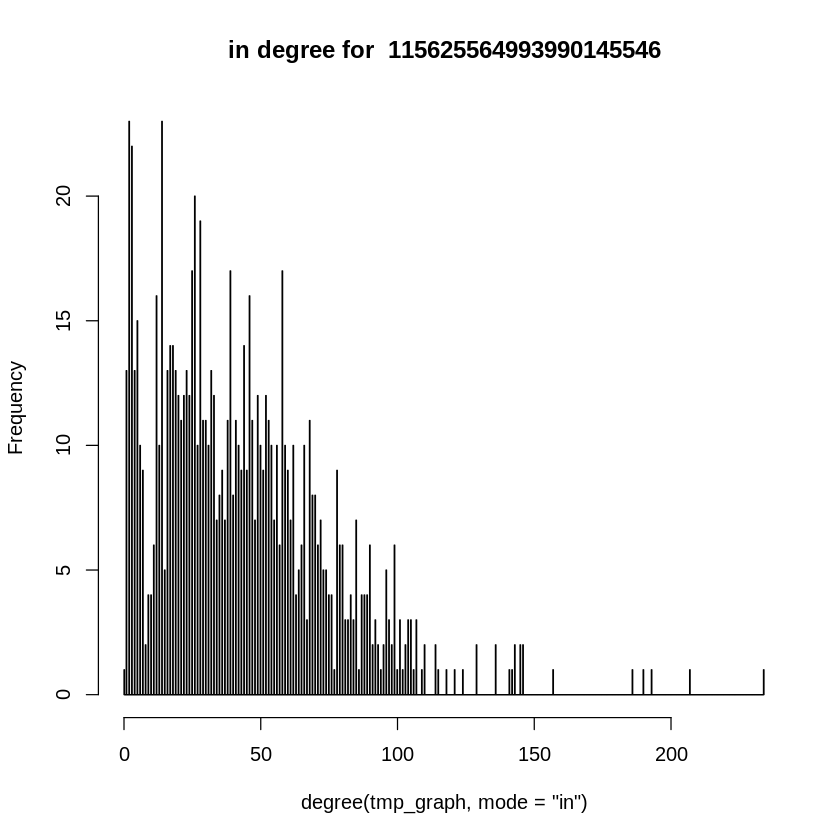

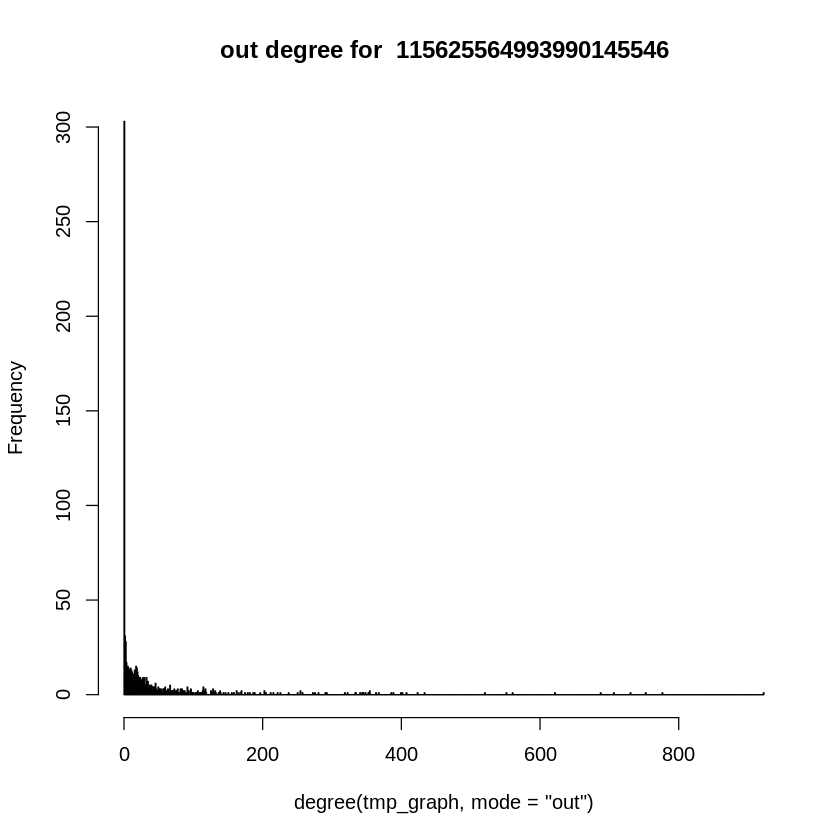

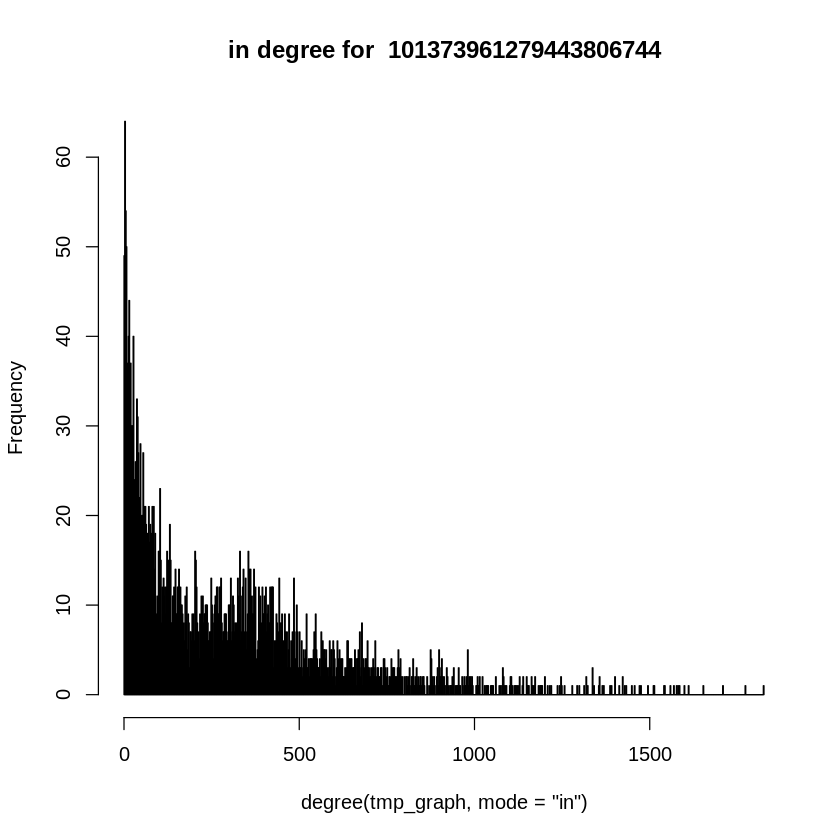

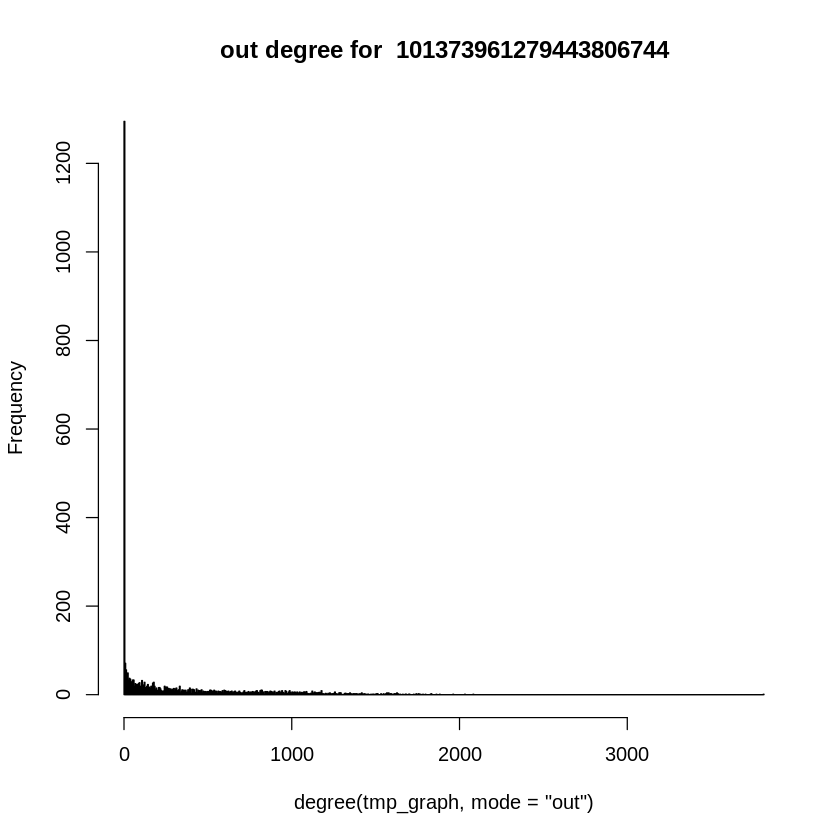

In [ ]:
interest_node = c('109327480479767108490', '115625564993990145546','101373961279443806744')
graph_inds = c()
for (i in 1: length(interest_node)) {
    graph_ind = which(node_names==interest_node[i])
    graph_inds = c(graph_inds, graph_ind)
    # print(graph_ind)
    tmp_graph = final_graph[[graph_ind]]
    hist(degree(tmp_graph, mode="in"), main=paste("in degree for ", interest_node[i]), breaks=1000)
    hist(degree(tmp_graph, mode="out"), main=paste("out degree for ", interest_node[i]), breaks=1000)
}


* The personal networks have a similar in and out degree distribution.

### QUESTION 20

[1] 0.2527654
[1] 0.3194726


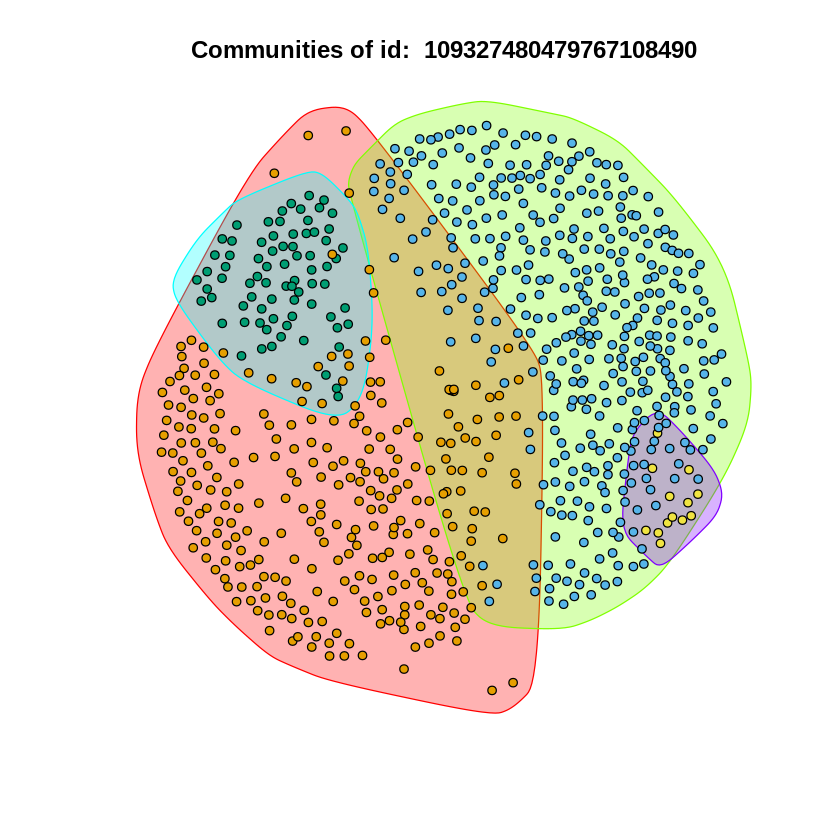

[1] 0.1910903


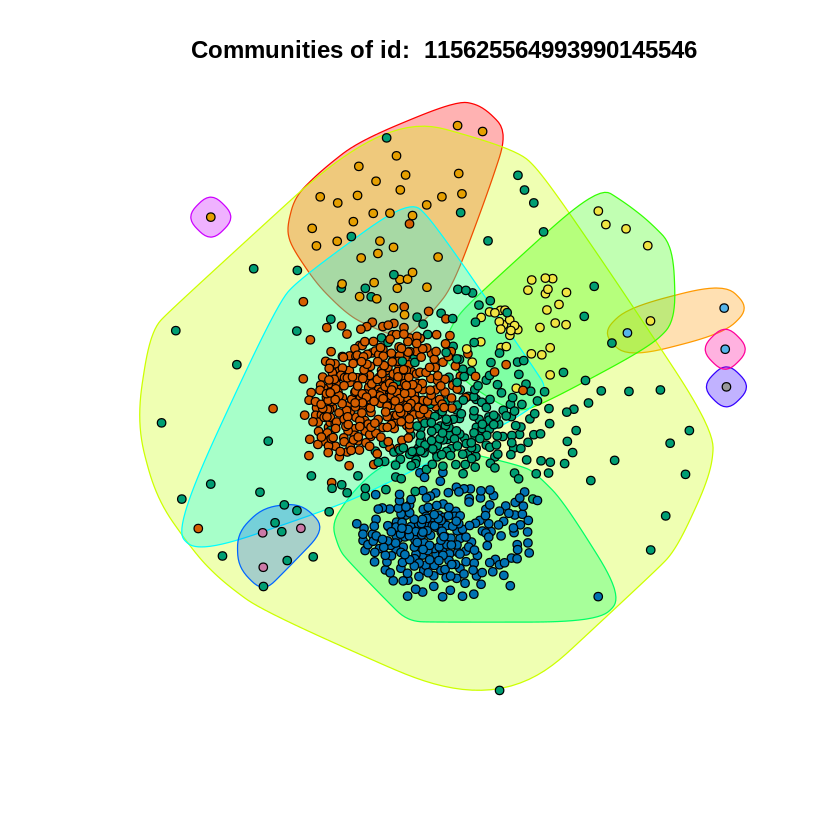

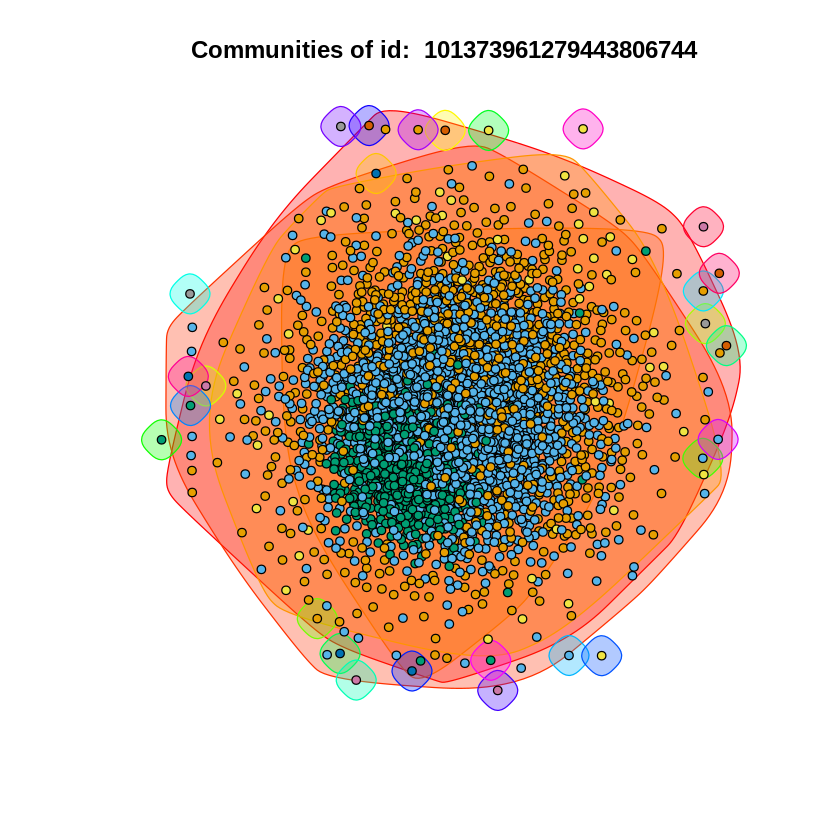

In [ ]:
interest_node = c('109327480479767108490', '115625564993990145546','101373961279443806744')
for (i in 1: length(interest_node)) {
    graph_ind = which(node_names==interest_node[i])
    tmp_graph = final_graph[[graph_ind]]
    tmp_communities = cluster_walktrap(tmp_graph, weights=NULL, steps=4, merges=TRUE, modularity=TRUE, membership=TRUE)
    print(modularity(tmp_communities))
    plot(tmp_communities, tmp_graph, vertex.size=3, vertex.label=NA, edge.arrow.size=0, edge.color=NA,
         main=paste("Communities of id: ", interest_node[i]))
}


* For the three networks, their community structures are shown above in different colors.
* We oberved a similar modularity scores for these networks.

> | Network ID | 109327480479767108490 | 115625564993990145546 | 101373961279443806744 |
> | -----      | ----- | ----- | ----- |
> | Modularity | 0.2527654 | 0.3194726 | 0.1910903 |

### QUESTION21

* $Homogeneity$ is defined to measure the degree of a clustering method that all data belonging to a cluster should have the same class.
* $Completeness$ is defined to measure the degree of a clustering method that all data with the same class should be contained in a same cluster.

### QUESTION 22

In [132]:
interest_node = c('109327480479767108490', '115625564993990145546','101373961279443806744')

for (n in 1:length(interest_node)) {

    graph_ind = which(node_names == interest_node[n])
    graph = final_graph[[graph_ind]]

    circles = graph_circles[[graph_ind]]
    n_circles = length(circles)
    N = 0
    a_list = list()
    for (i in 1:n_circles) {
      N = N + length(circles[[i]])
      a_list[[i]] = length(circles[[i]])
    }

    communities = cluster_walktrap(graph, weights=NULL, steps=4, merges=TRUE, modularity=TRUE, membership=TRUE)
    n_communities = length(communities)
    b_list = list()
    for (i in 1:n_communities) {
      b_list[[i]] = length(communities[[i]])
    }

    # Get H(C)
    HC = 0
    for (i in 1:n_circles) {
      HC = HC - a_list[[i]] / N * log(a_list[[i]] / N)
    }

    # Get H(K)
    HK = 0
    for (i in 1:n_communities) {
      HK = HK - b_list[[i]] / N * log(b_list[[i]] / N)
    }

    # Get H(C|K)
    HCK = 0
    for (j in 1:n_communities) {
      for (i in 1:n_circles) {
        Aji = length(intersect(communities[[j]], circles[[i]]))
        if (Aji > 0) 
          HCK = HCK - Aji / N * log(Aji / b_list[[j]])
      }
    }

    # Get H(K|C)
    HKC = 0
    for (i in 1:n_circles) {
      for (j in 1:n_communities) {
        Aji = length(intersect(communities[[j]], circles[[i]]))
        if (Aji > 0) 
          HKC = HKC - Aji / N * log(Aji / a_list[[i]])
      }
    }

    h = 1 - HCK / HC
    c = 1 - HKC / HK    

    cat("For network", interest_node[n], "\n")
    cat("h =", h, "\n")
    cat("c =", c, "\n")

}



For network 109327480479767108490 
h = 0.884913 
c = 0.5088401 
For network 115625564993990145546 
h = 0.7970808 
c = -0.1283379 
For network 101373961279443806744 
h = -0.679265 
c = -1.259542 


* The calculated values of $h$ and $c$ are summarized as follows:

>| Network ID            |  $h$       |  $c$     |
>| -----                 | -----      | -----    |
>| 109327480479767108490 | 0.8849     | 0.5088   |
>| 115625564993990145546 | 0.7970     | -0.1283  |
>| 101373961279443806744 | -0.6792    | -1.2595  |

* We observed negative values for some $h$ and $c$. That is, $h < 0$ if $H(C|K) > H(C)$, $c < 0$ if $H(K|C) > H(K)$.